In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Zadanko 1

## a)

In [5]:
df.loc[(df.Publisher == "Nintendo") & (df.Year > 2015) & (df.NA_Sales < df.EU_Sales)].reset_index(drop = True)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
1,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
2,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


## b)

In [6]:
df.loc[df.Year == 2010][["Genre", "Global_Sales"]].groupby("Genre").sum().sort_values("Global_Sales", ascending = False).iloc[0]

Global_Sales    117.64
Name: Action, dtype: float64

## c)

In [7]:
df_means = df[["Genre", "JP_Sales", "EU_Sales"]].groupby("Genre").mean()
df_means.loc[(df_means.JP_Sales > df_means.EU_Sales)].reset_index()[["Genre", "JP_Sales"]].rename(columns = {"Genre" : "Typ gry", "JP_Sales" : "Średnia sprzedaż w Japonii"}).sort_values("Średnia sprzedaż w Japonii", ascending = False).reset_index(drop = True)

,Typ gry,Średnia sprzedaż w Japonii
0,Role-Playing,0.238293
1,Puzzle,0.099439
2,Strategy,0.073284


# Zadanko 2

## Oryginalny wykres

![](wykres!.webp)

Link:
https://www.rp.pl/polityka/art19043381-sondaz-ibris-dla-rzeczpospolitej-poparcie-wzroslo-wszystkim-tylko-nie-konfederacji-i-psl

## Mój wykres z pracy domowej 02

![](RplotHW2.png)

Link: 
https://github.com/mini-pw/2022Z-DataVisualizationTechniques/tree/main/homeworks/hw2/Zbrze%C5%BCny_Grzegorz

In [10]:
import seaborn as sns

partie = ["PiS", "KO", "Polska 2050",
            "Lewica", "Konfederacja", "PSL", "nie wiem"]
procenty = [36, 25, 14, 9, 5, 5, 6]
data_sondaz = {"Partie" : partie, "Procent poparcia" : procenty}
df_sondaz = pd.DataFrame(data_sondaz)
df_sondaz

,Partie,Procent poparcia
0,PiS,36
1,KO,25
2,Polska 2050,14
3,Lewica,9
4,Konfederacja,5
5,PSL,5
6,nie wiem,6


# Wykres z PD02 poprawiony w pakiecie seaborn

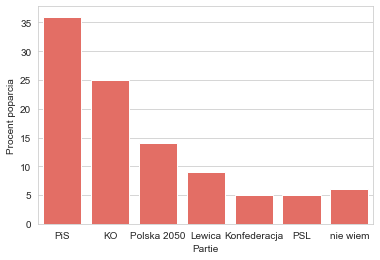

In [11]:
sns.set_style(style = "whitegrid")
theCoolerPlot =  sns.barplot(data = df_sondaz, x = "Partie", y = "Procent poparcia", color = "#F85C50")

Wykres z pakietu seaborn jest lepszy od tego z PD02 (którego wyższość nad oryginałem opisałem już w pd2), ponieważ informacja o tym ile osób nie opowiedziało się za żadną z partii wylądowała na końcu wykresu, co może ułatwić odczytanie wyników dla konkretnych partii. Ponadto zostawiłem tylko poziome linie, które pomagają w odczytaniu wartości na słupkach położonych dalej od osi Procentu popracia, ponieważ te pionowe były zbyteczne. Usunąłęm również dokładne wartości liczbowe z wierzchołków kolumn, ponieważ te wartości bardzo łatwo odczytać z wykresu.